<img style="float: center; margin: 60px 30px 30px 30px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="500" height="400" /> 
       
# <font color='navy'> Simulación matemática. 

**Nombres:** 
    Samuel Rodríguez Partida | ic727594

**Fecha:** 31 de octubre del 2022.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Link con el enlace del repositorio del creador del proyecto

#Proyecto 2

# <font color='navy' size=10 > PREDICCIÓN DE PRECIOS DE ACCIONES


## Introducción


## Objetivos

### Objetivo General:
- Aplicar los conocimientos aprendidos durante la clase para poder realizar un análisis de precio-umbral de cuatro
    acciones diferentes de la bolsa de valores
    
### Objetivos Específicos:
- Demostrar la capacidad necesaria para poder importar datos bursátiles desde la web
- Manejar con éxito los datos de las acciones para que mediante la media y desviación estándar se logren simular rendimientos diarios de acciones
- Predecir los costos futuros de las acciones elegidas con base en los rendimientos

In [28]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def get_close(names, start, end):
    closes = web.DataReader(names, 'yahoo', start, end)
    return closes['Adj Close'] 

In [6]:
# Descargamos datos...
names = ['AAPL', 'MSFT','GOOG','TSLA']
start = '24/10/2021'
end = '24/10/2022'

precios = get_close(names, start, end)

C:\Users\Samuel\anaconda3\lib\site-packages\pandas_datareader\_utils.py:33: UserWarning: Parsing '24/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start = to_datetime(start)
C:\Users\Samuel\anaconda3\lib\site-packages\pandas_datareader\_utils.py:37: UserWarning: Parsing '24/10/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)


<AxesSubplot:xlabel='Date'>

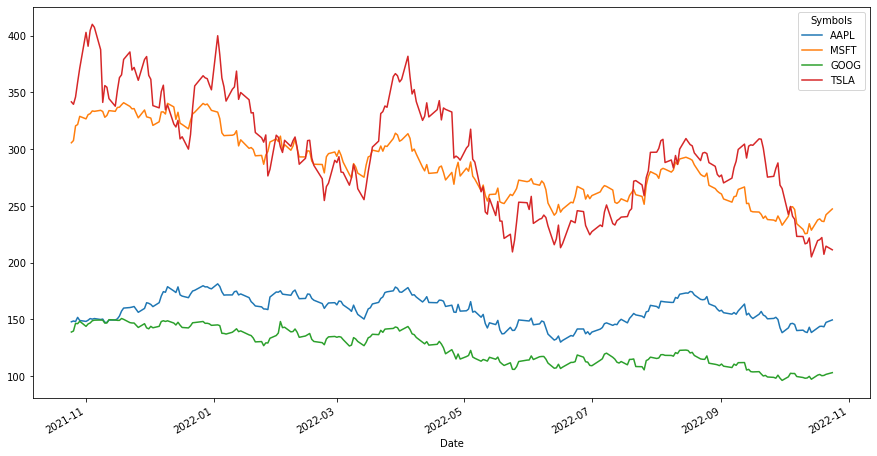

In [7]:
# graficos
precios.plot(figsize=(15,8))

<AxesSubplot:title={'center':'rendimientos log'}, xlabel='Date'>

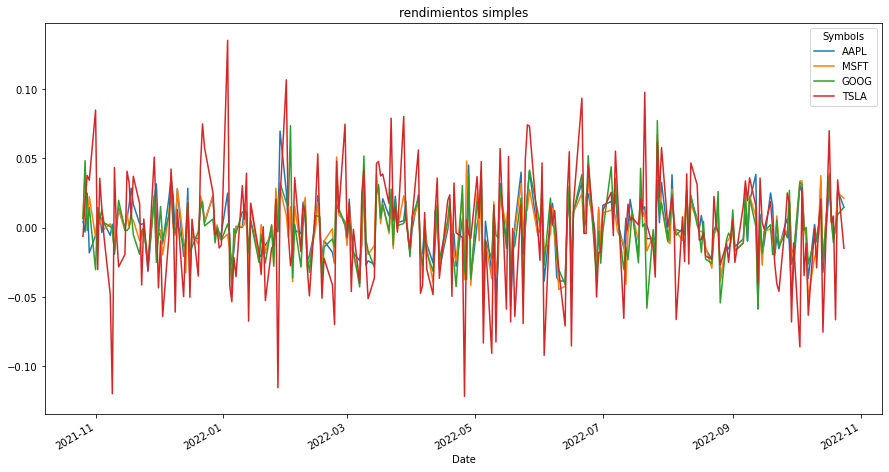

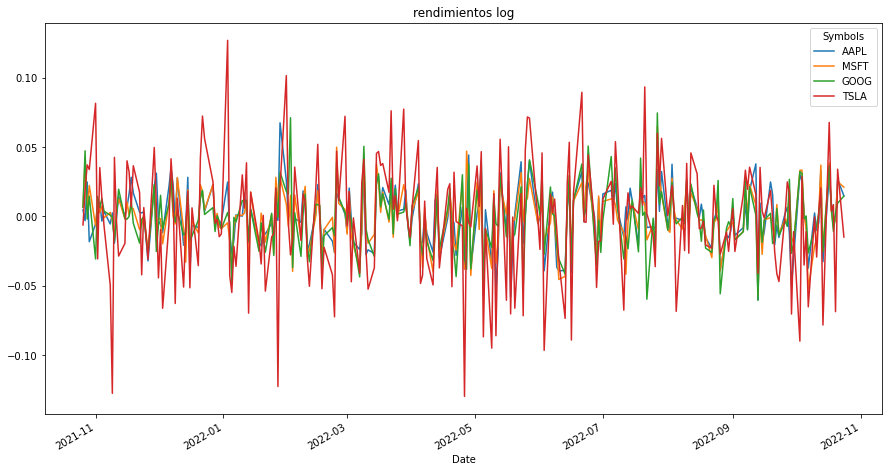

In [8]:
ret = precios.pct_change()
ret.plot(figsize=(15, 8), title = 'rendimientos simples')

ret2 = np.log(precios/precios.shift())
ret2.plot(figsize=(15, 8), title='rendimientos log')

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'MSFT'}>],
       [<AxesSubplot:title={'center':'GOOG'}>,
        <AxesSubplot:title={'center':'TSLA'}>]], dtype=object)

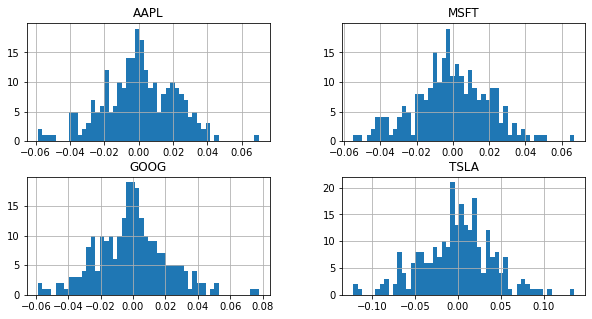

In [9]:
ret.hist(bins=50, figsize=(10,5))

In [10]:
mu_AAPL = ret['AAPL'].mean()
mu_MSFT = ret['MSFT'].mean()
mu_GOOG = ret['GOOG'].mean()
mu_TSLA = ret['TSLA'].mean()

std_AAPL = ret['AAPL'].std()
std_MSFT = ret['MSFT'].std()
std_GOOG = ret['GOOG'].std()
std_TSLA = ret['TSLA'].std()

(array([ 1.,  5.,  5.,  3.,  6.,  5.,  8.,  7., 12.,  8., 20., 21., 32.,
        27., 27., 33., 31., 42., 45., 40., 41., 42., 44., 45., 43., 41.,
        30., 36., 55., 34., 27., 15., 28., 21., 20., 19., 18., 14.,  5.,
         8.,  9.,  8.,  4.,  4.,  4.,  4.,  1.,  0.,  1.,  1.]),
 array([-0.05683601, -0.05438511, -0.0519342 , -0.0494833 , -0.04703239,
        -0.04458149, -0.04213058, -0.03967968, -0.03722877, -0.03477787,
        -0.03232696, -0.02987606, -0.02742515, -0.02497425, -0.02252334,
        -0.02007244, -0.01762153, -0.01517063, -0.01271972, -0.01026882,
        -0.00781791, -0.00536701, -0.0029161 , -0.0004652 ,  0.00198571,
         0.00443661,  0.00688752,  0.00933842,  0.01178933,  0.01424023,
         0.01669114,  0.01914204,  0.02159295,  0.02404385,  0.02649476,
         0.02894566,  0.03139657,  0.03384747,  0.03629838,  0.03874928,
         0.04120018,  0.04365109,  0.04610199,  0.0485529 ,  0.0510038 ,
         0.05345471,  0.05590561,  0.05835652,  0.06080742,

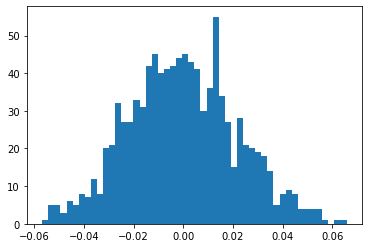

In [11]:
N = 1000
plt.hist(std_AAPL * np.random.randn(N)+mu_AAPL, bins=50)

(array([ 1.,  0.,  1.,  2.,  1.,  0.,  3.,  4.,  7.,  2.,  4.,  7., 10.,
        14., 21., 18., 26., 24., 32., 33., 46., 42., 46., 44., 58., 44.,
        51., 45., 49., 54., 45., 40., 35., 24., 27., 27., 22., 10., 19.,
        14., 13., 10.,  8.,  6.,  2.,  3.,  1.,  1.,  2.,  2.]),
 array([-0.07024066, -0.06763394, -0.06502722, -0.0624205 , -0.05981378,
        -0.05720706, -0.05460034, -0.05199362, -0.0493869 , -0.04678018,
        -0.04417346, -0.04156674, -0.03896002, -0.0363533 , -0.03374658,
        -0.03113986, -0.02853314, -0.02592642, -0.0233197 , -0.02071298,
        -0.01810626, -0.01549954, -0.01289282, -0.0102861 , -0.00767938,
        -0.00507266, -0.00246594,  0.00014078,  0.0027475 ,  0.00535422,
         0.00796094,  0.01056766,  0.01317438,  0.0157811 ,  0.01838782,
         0.02099454,  0.02360126,  0.02620798,  0.0288147 ,  0.03142142,
         0.03402815,  0.03663487,  0.03924159,  0.04184831,  0.04445503,
         0.04706175,  0.04966847,  0.05227519,  0.05488191,

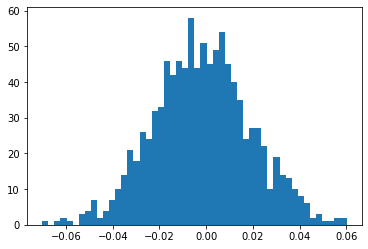

In [12]:
N = 1000
plt.hist(std_MSFT * np.random.randn(N)+mu_MSFT, bins=50)

(array([ 1.,  2.,  0.,  2.,  5.,  2.,  5., 10., 10., 16., 14., 13., 19.,
        26., 25., 29., 30., 33., 42., 42., 33., 46., 51., 61., 48., 54.,
        45., 34., 44., 40., 26., 31., 37., 23., 13., 20., 16., 10.,  8.,
         7.,  2.,  6.,  4.,  6.,  1.,  4.,  1.,  1.,  1.,  1.]),
 array([-0.06547194, -0.06275933, -0.06004672, -0.0573341 , -0.05462149,
        -0.05190888, -0.04919627, -0.04648365, -0.04377104, -0.04105843,
        -0.03834582, -0.0356332 , -0.03292059, -0.03020798, -0.02749537,
        -0.02478276, -0.02207014, -0.01935753, -0.01664492, -0.01393231,
        -0.01121969, -0.00850708, -0.00579447, -0.00308186, -0.00036924,
         0.00234337,  0.00505598,  0.00776859,  0.0104812 ,  0.01319382,
         0.01590643,  0.01861904,  0.02133165,  0.02404427,  0.02675688,
         0.02946949,  0.0321821 ,  0.03489472,  0.03760733,  0.04031994,
         0.04303255,  0.04574516,  0.04845778,  0.05117039,  0.053883  ,
         0.05659561,  0.05930823,  0.06202084,  0.06473345,

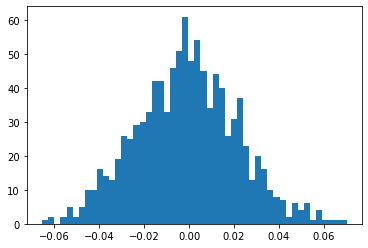

In [13]:
N = 1000
plt.hist(std_GOOG * np.random.randn(N)+mu_GOOG, bins=50)

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  7.,
         6., 12., 19., 20., 17., 24., 35., 32., 21., 47., 44., 50., 53.,
        46., 59., 68., 63., 41., 57., 44., 40., 33., 39., 21., 13., 23.,
        17.,  9.,  5.,  9.,  7.,  4.,  2.,  2.,  2.,  1.,  2.]),
 array([-0.15037766, -0.14503634, -0.13969501, -0.13435369, -0.12901236,
        -0.12367104, -0.11832971, -0.11298839, -0.10764706, -0.10230574,
        -0.09696441, -0.09162309, -0.08628176, -0.08094044, -0.07559911,
        -0.07025779, -0.06491646, -0.05957514, -0.05423381, -0.04889249,
        -0.04355116, -0.03820984, -0.03286851, -0.02752719, -0.02218586,
        -0.01684454, -0.01150322, -0.00616189, -0.00082057,  0.00452076,
         0.00986208,  0.01520341,  0.02054473,  0.02588606,  0.03122738,
         0.03656871,  0.04191003,  0.04725136,  0.05259268,  0.05793401,
         0.06327533,  0.06861666,  0.07395798,  0.07929931,  0.08464063,
         0.08998196,  0.09532328,  0.10066461,  0.10600593,

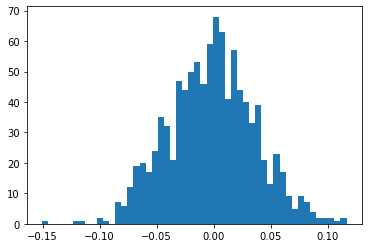

In [14]:
N = 1000
plt.hist(std_TSLA * np.random.randn(N)+mu_TSLA, bins=50)

In [21]:
#simularemos los escenarios con los rendimientos diarios de cada acción

def sim_rend(mu, std, ndays, nscen, start_date):
    
    #Generaremos un rango de fechas
    fechas = pd.date_range(start_date, periods=ndays, freq='B')
    
    #Generar la predicción de los rendimientos en la distribución normal
    datos = std * np.random.randn(ndays, nscen) + mu
    
    #Dataframe
    rendimientos_simulados = pd.DataFrame(datos, index=fechas)
    
    return rendimientos_simulados

In [22]:
#Se simularán 200 escenarios para un año para todas las empresas
ndays = 365
nscen = 200
start_date = '31/10/2022'



In [23]:
#TESLA
rend_simu_TSLA  = sim_rend(mu_TSLA, std_TSLA, ndays, nscen, start_date)
rend_simu_TSLA

C:\Users\Samuel\AppData\Local\Temp\ipykernel_10164\587477590.py:2: UserWarning: Parsing '31/10/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  rend_simu_TSLA  = sim_rend(mu_TSLA, std_TSLA, ndays, nscen, start_date)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2022-10-31,0.031394,0.002418,-0.006184,0.050410,-0.023202,-0.037146,0.072050,0.064133,-0.021672,0.001620,...,0.009377,0.001689,0.014990,0.035361,-0.016955,0.016545,-0.030751,-0.132716,0.026434,-0.008468
2022-11-01,0.002242,0.006803,0.000396,-0.012089,-0.011949,-0.020411,0.007222,-0.048755,-0.004197,-0.052554,...,-0.013505,0.104108,-0.065304,-0.006807,0.018480,-0.004760,0.038065,-0.048239,-0.004566,-0.040888
2022-11-02,0.037566,0.016794,-0.036044,-0.025266,-0.054516,-0.037239,0.082509,0.039141,-0.038237,0.001564,...,-0.021554,0.013079,-0.085377,-0.033680,-0.041548,-0.046138,0.069971,-0.048899,0.021659,-0.044025
2022-11-03,-0.052167,-0.058648,-0.007798,-0.004539,0.096212,0.018085,0.126624,-0.001513,0.081857,-0.044719,...,-0.076799,-0.059651,-0.042935,0.029126,0.002250,-0.003636,-0.039835,0.027395,-0.055806,-0.009722
2022-11-04,-0.006830,-0.033399,-0.013026,0.031817,0.027195,0.009805,-0.031226,-0.020540,0.091708,-0.044997,...,0.030382,0.042526,-0.073071,0.032550,0.051675,0.053132,-0.016522,0.025383,0.006441,0.088616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18,-0.007724,-0.015059,0.001717,-0.028459,-0.067672,-0.042638,-0.061861,-0.026848,-0.028847,-0.014743,...,-0.036182,0.026540,0.039565,0.099585,-0.060872,0.104973,0.011212,0.014829,0.074086,0.023571
2024-03-19,-0.019846,0.001226,0.002928,-0.059261,0.025613,-0.064242,0.009071,-0.036812,-0.006166,-0.067122,...,-0.022113,-0.017267,0.024613,0.065552,0.010216,0.041950,0.004405,0.012434,-0.002604,0.033735
2024-03-20,-0.087671,0.044336,-0.012500,0.026566,-0.084553,-0.065022,0.045095,0.019692,-0.010597,-0.005334,...,-0.020298,0.051512,-0.036215,-0.025000,0.012954,-0.046882,0.030405,-0.032428,-0.034914,-0.007475
2024-03-21,-0.068066,-0.026762,0.061543,-0.046815,-0.007385,0.027764,-0.000884,0.017655,-0.022325,-0.049366,...,0.000379,0.014466,-0.068799,-0.006764,0.003365,0.044232,-0.011950,0.030299,-0.055203,0.011401


In [24]:
#APPLE
rend_simu_AAPL  = sim_rend(mu_AAPL, std_AAPL, ndays, nscen, start_date)
rend_simu_AAPL

C:\Users\Samuel\AppData\Local\Temp\ipykernel_10164\1485539986.py:2: UserWarning: Parsing '31/10/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  rend_simu_AAPL  = sim_rend(mu_AAPL, std_AAPL, ndays, nscen, start_date)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2022-10-31,0.014430,-0.019962,-0.019415,-0.015969,-0.010320,-0.007389,0.020196,-0.007288,0.027030,-0.034391,...,0.012324,0.028388,0.015636,-0.008339,0.036753,0.006208,-0.015801,-0.017387,-0.008457,-0.025173
2022-11-01,-0.009534,0.006705,0.020428,0.012237,-0.016449,-0.015569,0.024324,-0.007291,0.031185,-0.038971,...,-0.003610,-0.003864,0.028559,0.024440,0.014107,0.050261,-0.006643,0.010594,0.007793,0.024114
2022-11-02,0.030578,0.019145,-0.004123,0.006083,-0.011319,0.008425,-0.024309,-0.004926,0.040747,0.010444,...,0.037313,-0.031725,0.028505,0.014111,-0.001918,0.002969,0.004462,0.023268,0.011807,0.001247
2022-11-03,-0.015460,0.013015,-0.018700,-0.003455,-0.022787,0.005404,-0.007171,-0.024705,-0.011195,-0.010125,...,-0.000021,0.003658,0.011888,-0.022837,0.019587,-0.027871,0.004781,0.029773,-0.026671,-0.024407
2022-11-04,0.015729,0.009112,0.009515,0.009581,0.021717,-0.028316,-0.012597,0.014292,0.024004,0.034661,...,0.027144,0.017120,0.008628,0.010363,0.013511,0.002635,-0.016446,-0.010609,-0.009804,-0.023602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18,0.026113,0.015095,-0.024382,-0.007292,-0.016597,0.030209,-0.027279,-0.003905,0.050158,-0.030070,...,-0.001244,0.007340,-0.028119,-0.026074,0.010704,-0.012558,-0.014707,0.007038,-0.017431,-0.027003
2024-03-19,0.010530,0.002772,0.004149,0.026939,-0.026549,0.018282,0.034587,0.006439,-0.013323,-0.027632,...,0.015327,-0.012632,0.005530,-0.008842,-0.003991,-0.007328,-0.013319,-0.022319,0.007428,-0.014100
2024-03-20,0.033262,0.000770,-0.011594,0.054881,-0.023811,0.047328,-0.033488,0.009984,-0.001208,0.005095,...,0.021694,-0.000755,-0.010969,-0.001638,-0.025456,0.019680,0.017388,0.032856,0.027217,-0.019781
2024-03-21,0.014618,0.000245,-0.009999,0.036991,-0.028387,-0.018928,-0.046646,0.021709,0.001480,0.019346,...,0.024559,0.045784,0.027900,0.024340,-0.003553,0.004346,-0.003298,0.005885,0.000378,-0.033265


In [25]:
#MICROSOFT
rend_simu_MSFT  = sim_rend(mu_MSFT, std_MSFT, ndays, nscen, start_date)
rend_simu_MSFT

C:\Users\Samuel\AppData\Local\Temp\ipykernel_10164\4229910670.py:2: UserWarning: Parsing '31/10/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  rend_simu_MSFT  = sim_rend(mu_MSFT, std_MSFT, ndays, nscen, start_date)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2022-10-31,0.026511,0.028069,0.008861,-0.008862,-0.018620,-0.008875,-0.043707,0.000272,0.007422,0.009343,...,0.004657,0.009351,0.006037,0.014448,0.023324,-0.012139,0.022571,0.015510,-0.027532,-0.032964
2022-11-01,-0.003661,0.019475,0.001215,0.007019,-0.028509,-0.019385,-0.006845,0.001615,0.007695,-0.022779,...,0.003746,-0.019241,0.013812,0.001878,-0.002128,-0.012645,-0.011627,0.024830,0.005280,0.026717
2022-11-02,-0.028112,0.013674,-0.011030,0.016030,0.016551,0.009187,-0.011821,-0.006672,-0.034748,-0.031846,...,-0.007037,0.028858,-0.019477,0.020478,0.028675,-0.024558,-0.000239,0.004591,-0.004710,-0.005062
2022-11-03,0.003643,0.007175,0.027601,0.004930,0.028407,-0.007884,0.035495,-0.026284,0.001773,-0.002857,...,0.025465,0.018533,0.023173,-0.017123,0.005921,-0.023159,-0.019354,0.000394,0.006469,-0.038330
2022-11-04,0.014518,0.014956,-0.020960,0.011536,0.022932,0.011287,-0.014958,-0.000582,-0.031272,-0.009708,...,-0.019189,0.036517,0.021630,0.005888,0.005638,0.016892,-0.013891,-0.010510,-0.058895,0.046528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18,0.048390,0.010736,0.009026,0.010142,-0.000789,-0.015259,0.014884,0.003595,0.011259,-0.009185,...,-0.008156,-0.008702,0.026184,0.013931,0.001239,-0.015394,-0.000870,-0.014664,0.031652,0.002073
2024-03-19,0.014236,-0.000248,0.007085,0.023665,0.017837,0.023046,-0.010262,0.024432,0.006950,0.012156,...,-0.001196,0.022073,0.006836,-0.013166,0.000925,0.012110,-0.019947,-0.031020,-0.033241,-0.005536
2024-03-20,0.001792,-0.010805,-0.038538,-0.002383,-0.006731,-0.027505,0.023976,-0.016850,0.011121,0.012171,...,-0.000727,-0.002363,0.014519,-0.014232,0.030698,0.024651,-0.020283,0.003654,-0.000922,0.003928
2024-03-21,-0.007626,-0.010018,-0.004031,0.036266,-0.012077,0.010134,0.003973,-0.020149,-0.007962,-0.029819,...,-0.000517,0.009864,-0.004925,-0.019580,-0.005343,0.030388,0.020883,0.025576,-0.010835,-0.015360


In [26]:
#GOOGLE
rend_simu_GOOG  = sim_rend(mu_GOOG, std_GOOG, ndays, nscen, start_date)
rend_simu_GOOG

C:\Users\Samuel\AppData\Local\Temp\ipykernel_10164\2339203495.py:2: UserWarning: Parsing '31/10/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  rend_simu_GOOG  = sim_rend(mu_GOOG, std_GOOG, ndays, nscen, start_date)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2022-10-31,-0.023812,0.011775,-0.021939,0.020391,-0.033911,-0.013177,0.000789,-0.021552,0.014290,0.002683,...,-0.021493,-0.030807,0.010814,-0.003153,-0.007704,-0.003458,0.010901,-0.003445,0.019523,-0.016771
2022-11-01,-0.010923,0.002408,0.009211,-0.038274,-0.022516,-0.026696,-0.014874,-0.025180,-0.011115,0.040218,...,0.017837,0.028384,0.065137,-0.010656,-0.049770,0.007029,0.011422,-0.027784,0.002866,0.013912
2022-11-02,-0.031162,-0.004380,-0.039818,0.050733,-0.019525,0.013139,-0.028514,0.017232,0.016216,0.002579,...,-0.008364,-0.004545,0.015826,0.020930,0.006789,-0.027796,-0.021840,0.013777,-0.018165,0.016968
2022-11-03,0.004140,-0.013213,-0.026350,-0.033648,-0.009038,0.025290,-0.048741,-0.003836,0.006284,-0.035752,...,-0.011521,0.013091,-0.039700,0.020580,-0.015986,0.019288,0.003071,0.005605,0.013419,-0.014664
2022-11-04,-0.028444,-0.008335,0.013852,0.048946,0.018747,0.016265,0.001204,-0.000191,-0.016353,0.010673,...,-0.013581,0.015170,-0.012434,0.026902,-0.007129,0.003897,-0.010224,-0.001741,0.036165,0.000196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18,-0.004165,-0.029338,0.034302,-0.025192,0.002385,0.008908,-0.015440,0.001281,0.007467,-0.023503,...,-0.031539,-0.013722,0.008715,-0.043763,0.017023,0.001314,-0.004181,-0.000527,-0.034580,0.031868
2024-03-19,-0.013524,0.012318,0.019593,0.003540,-0.016909,-0.013313,0.014611,0.017684,0.013634,0.004516,...,0.035427,0.000744,-0.011709,0.029944,-0.019954,-0.001056,0.001924,0.019093,0.001920,0.032649
2024-03-20,-0.008644,0.019978,0.032686,-0.005158,-0.011355,-0.005609,-0.029895,0.032242,-0.021862,-0.025846,...,-0.000513,0.028977,-0.028709,0.028154,-0.034229,-0.038327,-0.016986,0.035338,0.010147,0.047107
2024-03-21,0.013523,0.039483,0.008521,-0.000186,-0.004213,-0.005238,-0.024710,0.002909,0.021356,-0.007221,...,-0.007477,0.020235,0.007154,-0.004557,0.035622,-0.013267,-0.020702,0.037943,0.027302,-0.022327


<AxesSubplot:>

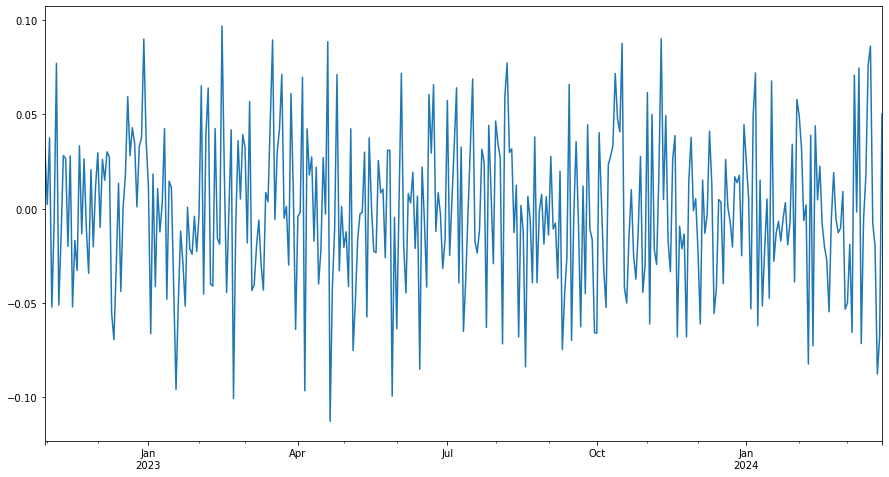

In [29]:
# Mostrar el comportamiento de los rendimientos
rend_simu_TSLA.iloc[:, 0].plot(figsize=(15,8), legend=False)

<AxesSubplot:>

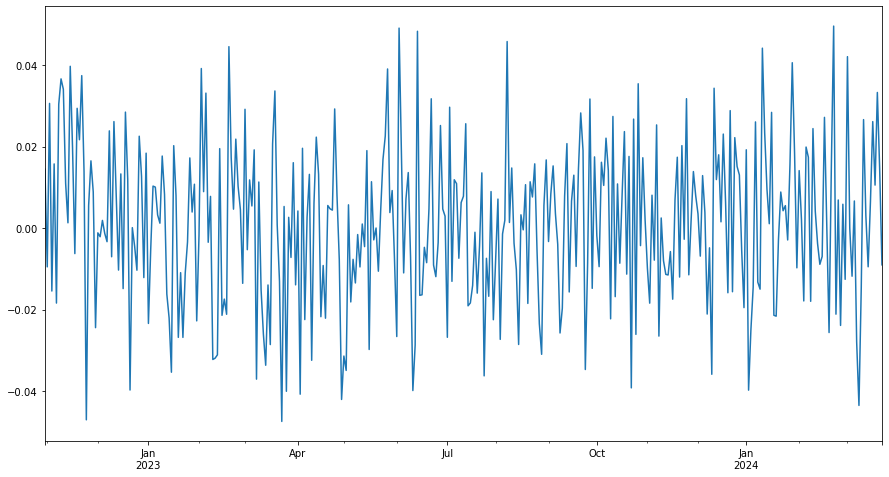

In [30]:
rend_simu_AAPL.iloc[:, 0].plot(figsize=(15,8), legend=False)

<AxesSubplot:>

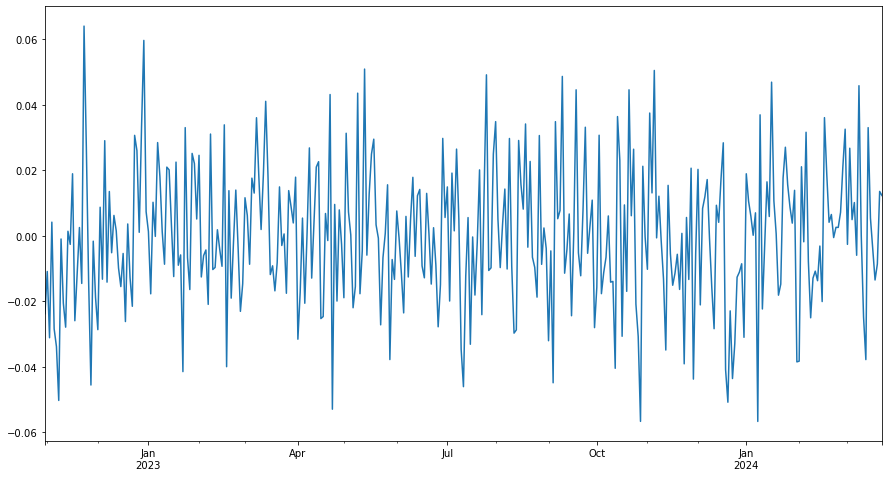

In [31]:
rend_simu_GOOG.iloc[:, 0].plot(figsize=(15,8), legend=False)

<AxesSubplot:>

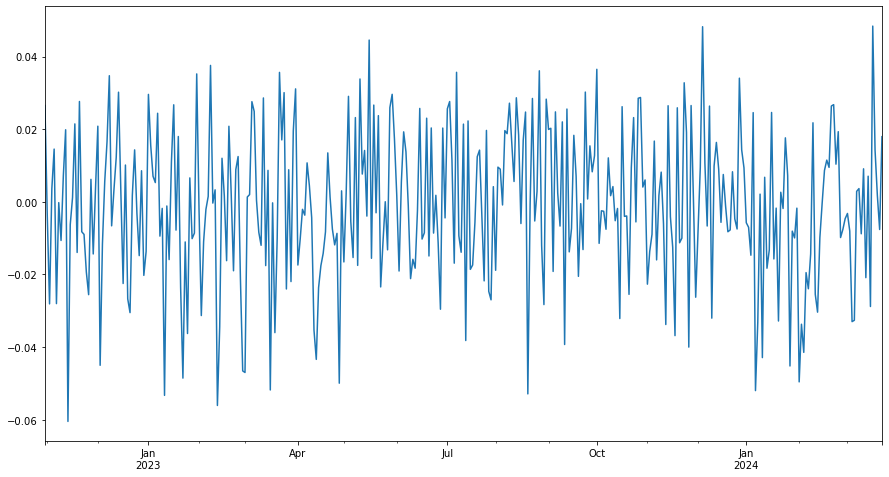

In [32]:
rend_simu_MSFT.iloc[:, 0].plot(figsize=(15,8), legend=False)

In [ ]:
rend_simu_TSLA.iloc[:, 0:4].hist(bins=50, figsize=(8,5))

In [ ]:
rend_simu_AAPL.iloc[:, 0:3].hist(bins=50, figsize=(8,5));

In [ ]:
rend_simu_MSFT.iloc[:, 0:3].hist(bins=50, figsize=(8,5));

In [ ]:
rend_simu_GOOG.iloc[:, 0:3].hist(bins=50, figsize=(8,5));